# Problem 1

### Sub-problem a)

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Taking user input

print('Enter the number of steps')
n_steps = int(input())

Enter the number of steps
4


In [3]:
n_steps

4

In [4]:
# To find the turn corresponding to each step with equal probability

random_turns = np.random.randint(2, size = n_steps)
random_turns

array([1, 0, 0, 1])

In [5]:
# To check for no bias

print('For left turns = ', (random_turns == 0).mean())
print('For right turns = ', (random_turns == 1).mean())

For left turns =  0.5
For right turns =  0.5


In [6]:
# For finding the path of the random walk

x = 0
y = 0
positions = [(x,y)]

for i in range(n_steps):
  x += 1
  positions.append((x,y))
  if random_turns[i] == 0:    # Left turn
    y += 1
  else:                       # Right turn
    y -= 1
  positions.append((x,y))

positions

[(0, 0), (1, 0), (1, -1), (2, -1), (2, 0), (3, 0), (3, 1), (4, 1), (4, 0)]

In [7]:
# To find the x and y cordinates for plotting the position of the walker

pos_points_xy = list(zip(*positions))
pos_points_xy

[(0, 1, 1, 2, 2, 3, 3, 4, 4), (0, 0, -1, -1, 0, 0, 1, 1, 0)]

In [8]:
# To find the position of the walker after executing both step and turn

end_points = []

for idx in range(2, len(positions), 2):
  end_points.append(positions[idx])

end_points

[(1, -1), (2, 0), (3, 1), (4, 0)]

In [9]:
# To find the x and y cordinates for plotting the position of the walker after executing both step and turn
pos_end_pts_xy = list(zip(*end_points))
pos_end_pts_xy

[(1, 2, 3, 4), (-1, 0, 1, 0)]

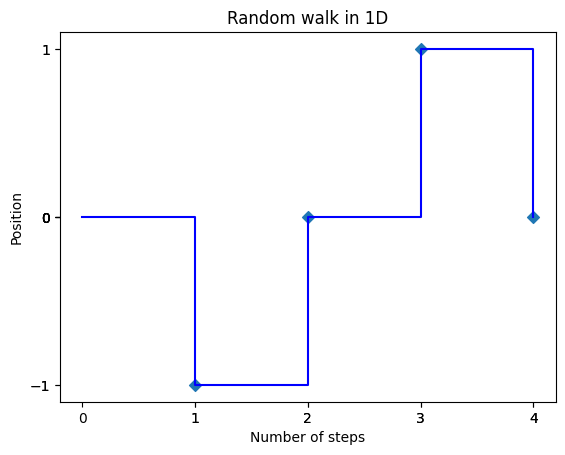

In [10]:
# To plot the position of the walker wrt the number of steps

x_coord = pos_points_xy[0]
y_coord = pos_points_xy[1]

plt.plot(x_coord, y_coord, 'b')
plt.scatter(pos_end_pts_xy[0], pos_end_pts_xy[1] , marker = 'D')

plt.xticks(x_coord)
plt.yticks(y_coord)

plt.xlabel('Number of steps')
plt.ylabel('Position')
plt.title('Random walk in 1D')

plt.show()

## Methods for performing the required tasks

In [11]:
# Function to find all the position in the 1-D random walk over the given number of simulations

def one_D_random_walk(n_steps, simulation_count, bias):
  n_steps = 20
  simulation_count = 100

  all_steps = np.empty([100, n_steps + 1])
  print('Dimention of the NumPy array containing the positions of all the steps: ', np.shape(all_steps))

  for simulation_num in range(simulation_count):

    if bias == 0:
      random_turns = np.random.choice(2, size = n_steps, p = [0.5, 0.5])
    else:
      random_turns = np.random.choice(2, size = n_steps, p = [0.55, 0.45])

    #print('Checking for bias in simulation ', simulation_num, ':')
    #print('For left turns = ', (random_turns == 0).mean())
    #print('For right turns = ', (random_turns == 1).mean())

    # For finding the path of the random walk
    y = 0
    positions = [y]

    for i in range(n_steps):
      if random_turns[i] == 0:    # Left turn
        y += 1
      else:                       # Right turn
        y -= 1
      positions.append(y)

    all_steps[simulation_num] = np.asarray(positions)

  #print(all_steps)
  return all_steps

In [12]:
# Function to plot the 1-D random walk

def plot_random_walk(n_steps, simulation_count, all_steps, bias):
  steps = np.arange(0, n_steps + 1)

  for simulation_num in range(simulation_count):
    plt.plot(steps, all_steps[simulation_num])
    plt.xlabel('Number of steps')
    plt.ylabel('Position')

  plt.xticks(steps)
  if bias == 0:
    string = ' without bias'
  else:
    string = ' with bias'
  plt.title('Trajectories of all the simulations' + string)


In [13]:
# Function to compute the mean position at each step

def find_avg_pos(n_steps, all_steps):
  mean_position = np.empty(n_steps)
  for step_no in range(n_steps):
      mean_position[step_no] = np.mean(all_steps[:, step_no + 1])
  return mean_position

In [14]:
# Function to compute the standard deviation at each step

def find_std_pos(n_steps, all_steps):
  std_position = np.empty(n_steps)
  for step_no in range(n_steps):
    std_position[step_no] = np.std(all_steps[:, step_no + 1])
  return std_position


In [15]:
# Function to compute the standard error of the mean at each step

def find_sem_pos(n_steps, std_position, all_steps):
  sem_position = np.empty(n_steps)
  for step_no in range(n_steps):
    sd = std_position[step_no]
    pos = all_steps[:, step_no + 1]
    sem_position[step_no] = sd/np.sqrt(np.size(pos))
  return sem_position


In [16]:
# Function to compute the mean squared displacement/error

def find_msd_pos(n_steps, all_steps):
  msd_position = np.empty(n_steps)
  for step_no in range(n_steps):
      msd_position[step_no] = np.mean(all_steps[:, step_no + 1]**2)
  return msd_position

In [17]:
# Plot the average position as a function of the number of steps along with error bars

def plot_mean_err(n_steps, avg_pos, std_pos, eb):
  steps = np.arange(1, n_steps + 1)

  plt.errorbar(steps, avg_pos, yerr = std_pos,
               marker='s', capsize=5)
  plt.xlabel('Number of steps')
  plt.ylabel('Mean Position')

  plt.xticks(steps)
  plt.legend(['Average position with err='+eb])
  plt.title('Mean position of all the simulations V/S Number of steps')


In [18]:
# Plot the mean square displacement/error as a function of the number of steps.

def plot_msd(n_steps, msd_pos):
  steps = np.arange(1, n_steps + 1)

  plt.plot(steps, msd_pos)
  plt.xlabel('Number of steps')
  plt.ylabel('Mean Square Displacement')

  plt.xticks(steps)
  plt.title('Mean Square Displacement V/S Number of steps')

In [19]:
# Plot histogram of the position distribution at the given step number

def plot_distribution(all_steps, step_no, mean, sd):
  n, bins, patches = plt.hist(all_steps[:, step_no], bins = 12, density=True , color = 'brown')

  # add a 'best fit' line
  y = ((1 / (np.sqrt(2 * np.pi) * sd)) * np.exp(-0.5 * (1 / sd * (bins - mean))**2))
  plt.plot(bins, y, '--', color = 'tomato')

  plt.xlabel('Position')
  plt.ylabel('Probability')

  #plt.xticks(steps)
  plt.title('Position distribution')

### Sub-problem b)

Dimention of the NumPy array containing the positions of all the steps:  (100, 21)
[[ 0. -1. -2. ...  0.  1.  2.]
 [ 0. -1. -2. ... -4. -5. -4.]
 [ 0.  1.  2. ... -4. -3. -2.]
 ...
 [ 0.  1.  0. ...  0. -1.  0.]
 [ 0.  1.  0. ... -6. -5. -6.]
 [ 0. -1.  0. ... -6. -7. -6.]] 




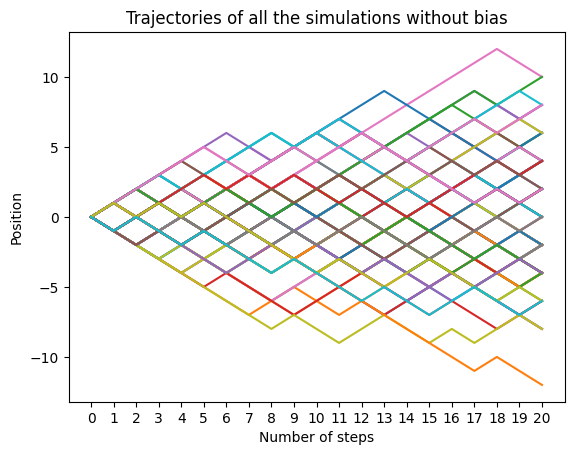

In [20]:
# Simulation without bias

n_steps= 20
simulation_count = 100

bias = 0

all_steps = one_D_random_walk(n_steps, simulation_count, bias)
print(all_steps, '\n\n')

plot_random_walk(n_steps, simulation_count, all_steps, bias)



In [21]:
# To find the mean position at each step

avg_pos = find_avg_pos(n_steps, all_steps)
print('The mean position at each step is: \n', avg_pos)

The mean position at each step is: 
 [-0.12 -0.12 -0.1  -0.22 -0.04  0.04  0.08  0.02  0.14  0.14  0.2  -0.02
 -0.06 -0.2  -0.18  0.   -0.1  -0.16 -0.3  -0.18]


In [22]:
# To find the standard deviation position at each step

std_pos = find_std_pos(n_steps, all_steps)
print('The standard deviation of the position at each step is: \n', std_pos)

The standard deviation of the position at each step is: 
 [0.99277389 1.4091132  1.63401346 1.85245783 2.04899976 2.3491275
 2.61411553 2.82127631 2.94285576 3.15283999 3.26190129 3.44667956
 3.43458877 3.49284984 3.65617286 3.75233261 4.00374824 4.09565624
 4.23674403 4.37351118]


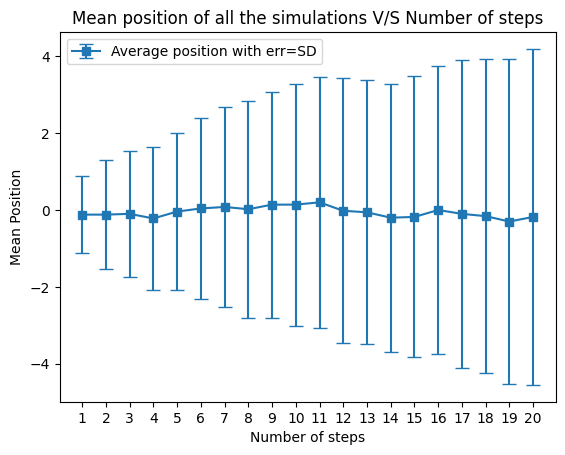

In [23]:
# To plot the Mean position at each step with Standad Deviation as error bars

plot_mean_err(n_steps, avg_pos, std_pos , 'SD')

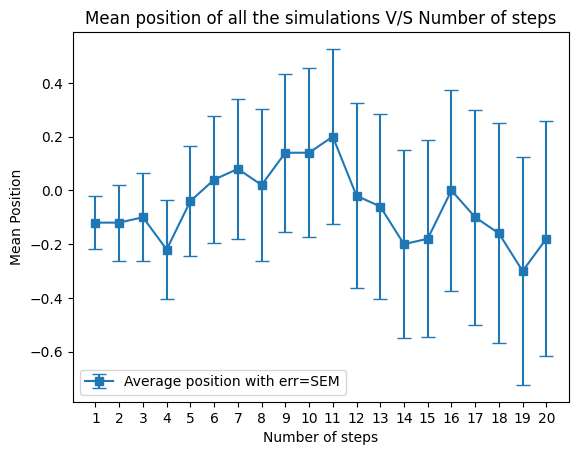

In [24]:
# To plot the Mean position at each step with Standard Error of the Mean as error bars

sem_pos= find_sem_pos(n_steps, std_pos, all_steps)
plot_mean_err(n_steps, avg_pos, sem_pos, 'SEM')

The mean squared displacement corresponsing to each step is: 
 [ 1.    2.    2.68  3.48  4.2   5.52  6.84  7.96  8.68  9.96 10.68 11.88
 11.8  12.24 13.4  14.08 16.04 16.8  18.04 19.16] 




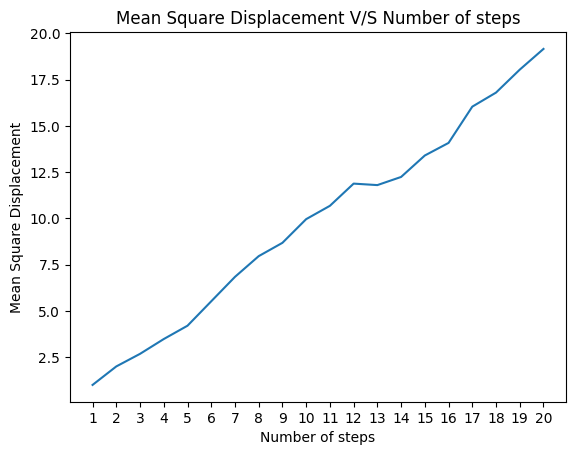

In [25]:
# To compute and plot the mean squared displacement

msd_pos = find_msd_pos(n_steps, all_steps)
print('The mean squared displacement corresponsing to each step is: \n', msd_pos, '\n\n')

plot_msd(n_steps, msd_pos)

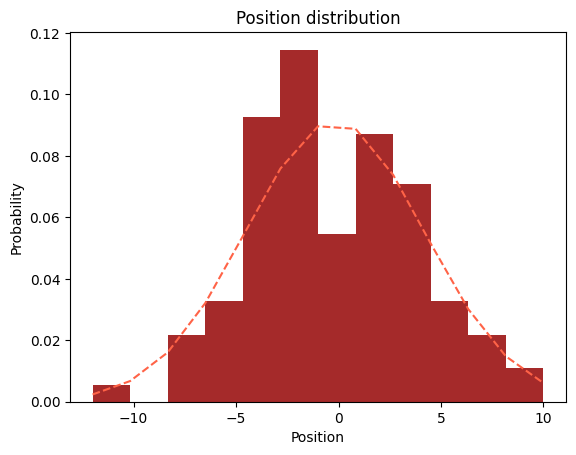

In [26]:
# To plot the distribution of positions at the last step

step_no = -1
mean = avg_pos[step_no]
sd = std_pos[step_no]
plot_distribution(all_steps, step_no, mean, sd)

# Sub-problem c)

Dimention of the NumPy array containing the positions of all the steps:  (100, 21)
[[ 0.  1.  2. ...  6.  5.  6.]
 [ 0.  1.  2. ...  0.  1.  0.]
 [ 0. -1.  0. ...  0.  1.  2.]
 ...
 [ 0.  1.  0. ... -2. -1.  0.]
 [ 0.  1.  2. ...  0.  1.  0.]
 [ 0. -1.  0. ...  4.  3.  2.]] 




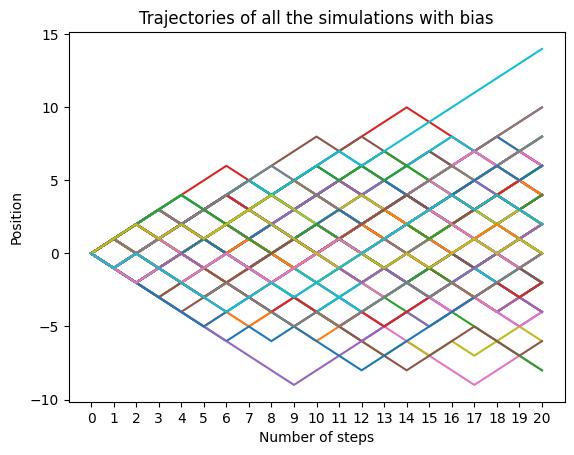

In [27]:
# Simulation with bias

n_steps= 20
simulation_count = 100

bias = 1
all_steps = one_D_random_walk(n_steps, simulation_count, bias)
print(all_steps, '\n\n')

plot_random_walk(n_steps, simulation_count, all_steps, bias)



In [28]:
# To find the mean position at each step

avg_pos = find_avg_pos(n_steps, all_steps)
print('The mean position at each step is: \n', avg_pos)

The mean position at each step is: 
 [0.02 0.12 0.32 0.42 0.42 0.7  0.72 0.68 0.6  0.72 0.78 0.76 0.96 1.24
 1.3  1.52 1.56 1.68 1.82 1.76]


In [29]:
# To find the standard deviation position at each step

std_pos = find_std_pos(n_steps, all_steps)
print('The standard deviation of the position at each step is: \n', std_pos)

The standard deviation of the position at each step is: 
 [0.99979998 1.46478667 1.67857082 1.92447395 2.17798072 2.40624188
 2.57713019 2.70140704 2.82842712 3.06620286 3.22360047 3.29581553
 3.29824196 3.29581553 3.4568772  3.4539253  3.56740802 3.71720325
 3.84806445 3.98276286]


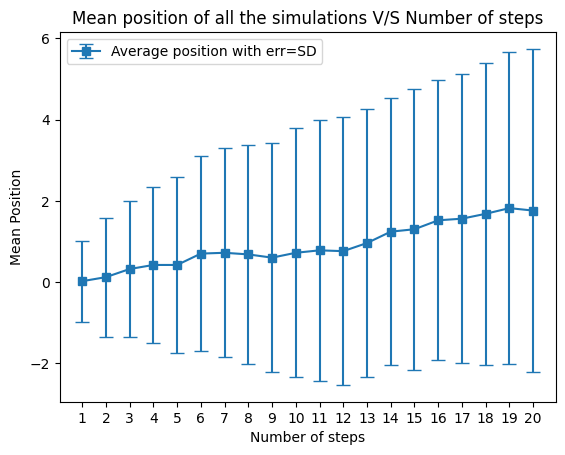

In [30]:
# To plot the Mean position at each step with Standad Deviation as error bars

plot_mean_err(n_steps, avg_pos, std_pos , 'SD')

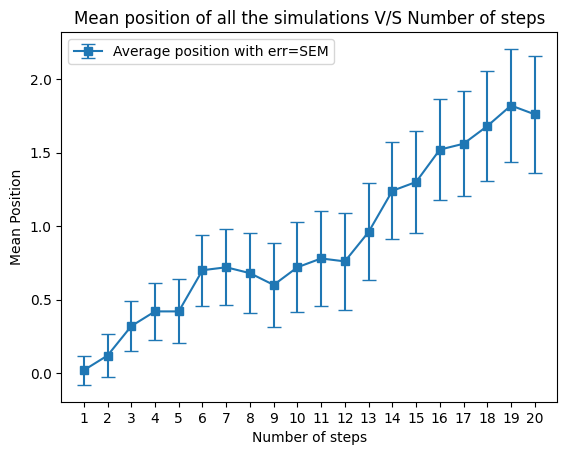

In [31]:
# To plot the Mean position at each step with Standard Error of the Mean as error bars

sem_pos= find_sem_pos(n_steps, std_pos, all_steps)
plot_mean_err(n_steps, avg_pos, sem_pos, 'SEM')

The mean squared displacement corresponsing to each step is: 
 [ 1.    2.16  2.92  3.88  4.92  6.28  7.16  7.76  8.36  9.92 11.   11.44
 11.8  12.4  13.64 14.24 15.16 16.64 18.12 18.96] 




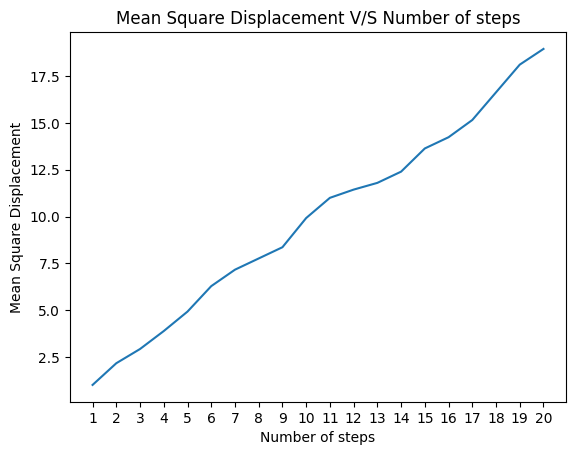

In [32]:
# To compute and plot the mean squared displacement

msd_pos = find_msd_pos(n_steps, all_steps)
print('The mean squared displacement corresponsing to each step is: \n', msd_pos, '\n\n')

plot_msd(n_steps, msd_pos)

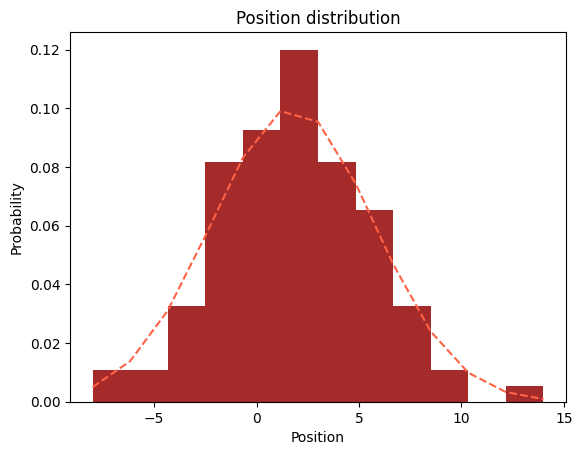

In [33]:
# To plot the distribution of positions at the last step

step_no = -1
mean = avg_pos[step_no]
sd = std_pos[step_no]
plot_distribution(all_steps, step_no, mean, sd)